# *CIBERSEGURIDAD*

### "Bootcamp IX"

<br><br>
<br><br>

*Informe Práctica Módulo Machine Learning y Ciberseguridad.*

*Maximiliano Dariel Altamirano.*

*Academia KeepCoding.*

## Consigna

Entendiendo que abordamos una problemática de clasificación, intentaremos cubrir las siguientes peticiones del análisis:
1. Preparación de datos: División train/test
2. Análisis exploratorio, por ejemplo:
    1. Head, describe, dtypes, etc.
    2. Outliers
    3. Correlación
3. Preprocesamiento:
    1. Eliminación de variables, mediante selección (random forest/Lasso), alta
correlación, alto porcentaje de missings, o el método que se considere
oportuno.
    2. Generación de variables
4. Modelado:
    1. Cross validation
    2. Evaluación; mejor si lo hacéis de más de un modelo, porque así podéis
comparar entre ellos.
5. Conclusión: escrita, no numérica; un par de líneas es más que suficiente.

### Preparación de datos:

1. Importamos las librerías necesarias para el tratamiento de datos.
2. Exploramos los campos del dataset "cybersecurity_attacks.csv" haciendo el primer análisis para determinar que columnas son candidatas para el modelo ML.
3. Importamos el dataset con pandas y le asignamos el alias "df".
    

**Importamos las librerías necesarias para el tratamiento de datos.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Exploramos los campos del dataset "cybersecurity_attacks.csv" haciendo el primer análisis para determinar que columnas son candidatas para el modelo ML.**

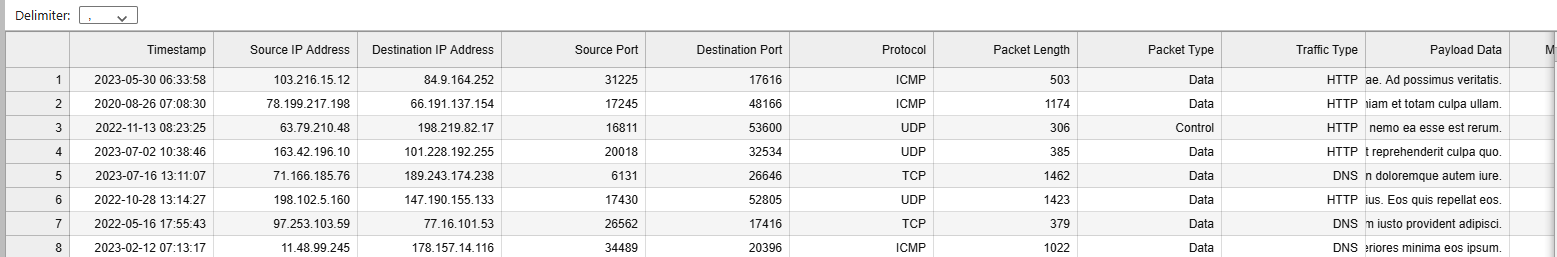

**Importamos el dataset con pandas y le asignamos el alias "df".**

In [2]:
df = pd.read_csv("cybersecurity_attacks.csv")
pd.options.display.max_columns = None

### Análisis exploratorio
1. Identificamos el tipo de dato en cada columna con la función *dtypes* y las dimensiones de la tabla con *shape*.
2. Validamos información de la tabla con la función *info*, marcando como dato relevante los datos no nulos de cada columna.
3. Con la función *describe* generamos una descripción completa de la tabla valorando la información de datos *unique vs count*.
4. Haremos un conteo de nuestra columna objetivo *Action Taken* para valorar si los campos se corresponden a datos balanceados.

**Identificamos el tipo de dato en cada columna con la función dtypes y las dimensiones de la tabla con shape.**

In [3]:
print("filas, columnas:",df.shape)
df.dtypes

filas, columnas: (40000, 25)


Timestamp                  object
Source IP Address          object
Destination IP Address     object
Source Port                 int64
Destination Port            int64
Protocol                   object
Packet Length               int64
Packet Type                object
Traffic Type               object
Payload Data               object
Malware Indicators         object
Anomaly Scores            float64
Alerts/Warnings            object
Attack Type                object
Attack Signature           object
Action Taken               object
Severity Level             object
User Information           object
Device Information         object
Network Segment            object
Geo-location Data          object
Proxy Information          object
Firewall Logs              object
IDS/IPS Alerts             object
Log Source                 object
dtype: object

**Valoramos información de la tabla con la función "*info*", marcando como dato relevante los datos no nulos de cada columna.**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      20000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         19933 non-null  object 
 13  Attack Type             40000 non-null  object 
 14  Attack Signature        40000 non-null

**Con la función *"describe"* generamos una descripción completa de la tabla valorando la información de datos unique vs count.**

In [5]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Timestamp,40000,39997,2022-06-11 14:28:15,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Source IP Address,40000,40000,103.216.15.12,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination IP Address,40000,40000,84.9.164.252,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Source Port,40000.0,NaN,NaN,NaN,32970.35645,18560.425604,1027.0,16850.75,32856.0,48928.25,65530.0
Destination Port,40000.0,NaN,NaN,NaN,33150.86865,18574.668842,1024.0,17094.75,33004.5,49287.0,65535.0
Protocol,40000,3,ICMP,13429,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Packet Length,40000.0,NaN,NaN,NaN,781.452725,416.044192,64.0,420.0,782.0,1143.0,1500.0
Packet Type,40000,2,Control,20237,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Traffic Type,40000,3,DNS,13376,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Payload Data,40000,40000,Qui natus odio asperiores nam. Optio nobis ius...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Haremos un conteo de nuestra columna objetivo Action Taken para valorar si los campos se corresponden a datos balanceados.**

In [6]:
df['Action Taken'].value_counts()  # tenemos resultados balanceados.

Action Taken
Blocked    13529
Ignored    13276
Logged     13195
Name: count, dtype: int64

### Preprocesamiento/Generación de variables
Haremos algunas transformaciones de datos necesarias para avanzar en el análisis:

1. Realizamos una primera selección de columnas.
2. Generamos columnas nuevas 'Localidad' y 'Region' para separar la información de los campos 'Geo-location Data'. Prescindimos de la columna redundante.
3. Extraemos la versión del navegador vulnerado de la columna 'Device Information'.
4. Asignamos valor a las celdas *NaN* de la columna 'Malware Indicators'.
5. Codificaremos nuestros datos Categóricos a Numéricos con el módulo "LabelEncoder".
6. Utilizamos *RandomForestClassifier* para identificar las columnas con más importancia
7. Confeccionamos un diagrama de *Heatmap* con el módulo *Seaborn* con la intención de validar o descartar columnas previamente seleccionadas.

In [7]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Timestamp,40000,39997,2022-06-11 14:28:15,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Source IP Address,40000,40000,103.216.15.12,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination IP Address,40000,40000,84.9.164.252,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Source Port,40000.0,NaN,NaN,NaN,32970.35645,18560.425604,1027.0,16850.75,32856.0,48928.25,65530.0
Destination Port,40000.0,NaN,NaN,NaN,33150.86865,18574.668842,1024.0,17094.75,33004.5,49287.0,65535.0
Protocol,40000,3,ICMP,13429,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Packet Length,40000.0,NaN,NaN,NaN,781.452725,416.044192,64.0,420.0,782.0,1143.0,1500.0
Packet Type,40000,2,Control,20237,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Traffic Type,40000,3,DNS,13376,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Payload Data,40000,40000,Qui natus odio asperiores nam. Optio nobis ius...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Preselección de columnas**

Prescindimos de las siguientes columnas, ya que sus campos no aportan información relevante para el modelo:

*'Timestamp','Source IP Address','Destination IP Address','Payload Data','Anomaly Scores','User Information','Network Segment','Proxy Information','IDS/IPS Alerts'*

In [8]:
df = df.drop(columns=['Timestamp','Packet Length','Source IP Address','Destination IP Address','Source Port','Destination Port','Payload Data','Anomaly Scores','User Information','Network Segment','Proxy Information','IDS/IPS Alerts'])
df

,Protocol,Packet Type,Traffic Type,Malware Indicators,Alerts/Warnings,Attack Type,Attack Signature,Action Taken,Severity Level,Device Information,Geo-location Data,Firewall Logs,Log Source
0,ICMP,Data,HTTP,IoC Detected,NaN,Malware,Known Pattern B,Logged,Low,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,"Jamshedpur, Sikkim",Log Data,Server
1,ICMP,Data,HTTP,IoC Detected,NaN,Malware,Known Pattern A,Blocked,Low,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,"Bilaspur, Nagaland",Log Data,Firewall
2,UDP,Control,HTTP,IoC Detected,Alert Triggered,DDoS,Known Pattern B,Ignored,Low,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,"Bokaro, Rajasthan",Log Data,Firewall
3,UDP,Data,HTTP,NaN,Alert Triggered,Malware,Known Pattern B,Blocked,Medium,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,"Jaunpur, Rajasthan",NaN,Firewall
4,TCP,Data,DNS,NaN,Alert Triggered,DDoS,Known Pattern B,Blocked,Low,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,"Anantapur, Tripura",NaN,Firewall
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,UDP,Control,HTTP,IoC Detected,NaN,DDoS,Known Pattern A,Logged,Medium,Mozilla/5.0 (iPad; CPU iPad OS 14_2_1 like Mac...,"Nashik, Manipur",Log Data,Firewall
39996,UDP,Control,HTTP,IoC Detected,NaN,DDoS,Known Pattern A,Logged,High,Mozilla/5.0 (Windows; U; Windows 98; Win 9x 4....,"Vadodara, Mizoram",Log Data,Firewall
39997,UDP,Data,DNS,IoC Detected,NaN,DDoS,Known Pattern B,Blocked,Low,Mozilla/5.0 (Windows; U; Windows NT 4.0) Apple...,"Mahbubnagar, Himachal Pradesh",Log Data,Server
39998,UDP,Data,FTP,IoC Detected,Alert Triggered,Malware,Known Pattern B,Ignored,Low,Mozilla/5.0 (X11; Linux i686) AppleWebKit/536....,"Rourkela, Arunachal Pradesh",Log Data,Server


**Generamos columnas nuevas 'Localidad' y 'Region' para separar la información de los campos 'Geo-location Data'. Prescindimos de la columna redundante.**

In [9]:
df[['Localidad','Region']] = df['Geo-location Data'].str.split(',', expand=True)
df['Localidad'] = df['Localidad'].str.strip()
df['Region'] = df['Region'].str.strip()
df = df.drop(columns=['Geo-location Data'])

**Extraemos la versión del navegador vulnerado de la columna 'Device Information'.**

In [10]:
df['Device Information'] = df['Device Information'].str.split('(').str[0]
df['Device Information'] = df['Device Information'].str.strip()

**Asignamos valor a las celdas NaN de las columna'Malware Indicators'.**

In [11]:
df[['Malware Indicators']] = df[['Malware Indicators']].fillna('IoC No Detected')
df[['Alerts/Warnings']] = df[['Alerts/Warnings']].fillna('No Alert')
df[['Firewall Logs']] = df[['Firewall Logs']].fillna('No Log Data')

In [12]:
df.describe(include='all')

,Protocol,Packet Type,Traffic Type,Malware Indicators,Alerts/Warnings,Attack Type,Attack Signature,Action Taken,Severity Level,Device Information,Firewall Logs,Log Source,Localidad,Region
count,40000,40000,40000,40000,40000,40000,40000,40000,40000,40000,40000,40000,40000,40000
unique,3,2,3,2,2,3,2,3,3,181,2,2,316,28
top,ICMP,Control,DNS,IoC Detected,No Alert,DDoS,Known Pattern A,Blocked,Medium,Mozilla/5.0,Log Data,Firewall,Ghaziabad,Manipur
freq,13429,20237,13376,20000,20067,13428,20076,13529,13435,31951,20039,20116,241,1498


**Codificaremos nuestros datos Categóricos a Numéricos con el módulo "LabelEncoder".**

In [13]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}

columns_to_encode = [
    'Protocol', 'Packet Type', 'Traffic Type', 'Malware Indicators','Alerts/Warnings', 'Attack Type',
    'Attack Signature', 'Action Taken', 'Severity Level','Device Information', 'Firewall Logs', 'Log Source', 'Localidad',
    'Region'
]

for column in columns_to_encode:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le  # Guardar el encoder por si necesitas revertir el proceso después
df

,Protocol,Packet Type,Traffic Type,Malware Indicators,Alerts/Warnings,Attack Type,Attack Signature,Action Taken,Severity Level,Device Information,Firewall Logs,Log Source,Localidad,Region
0,0,1,2,0,1,2,1,2,1,0,0,1,134,21
1,0,1,2,0,1,2,0,0,1,0,0,0,60,17
2,2,0,2,0,0,0,1,1,1,0,0,0,61,20
3,2,1,2,1,0,2,1,0,2,0,1,0,135,20
4,1,1,0,1,0,0,1,0,1,0,1,0,20,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,2,0,2,0,1,0,0,2,2,0,0,0,210,14
39996,2,0,2,0,1,0,0,2,0,0,0,0,307,16
39997,2,1,0,0,1,0,1,0,1,0,0,1,178,8
39998,2,1,1,0,0,2,1,1,1,0,0,1,252,1


**Utilizamos *RandomForestClassifier* para identificar las columnas con más importancia**

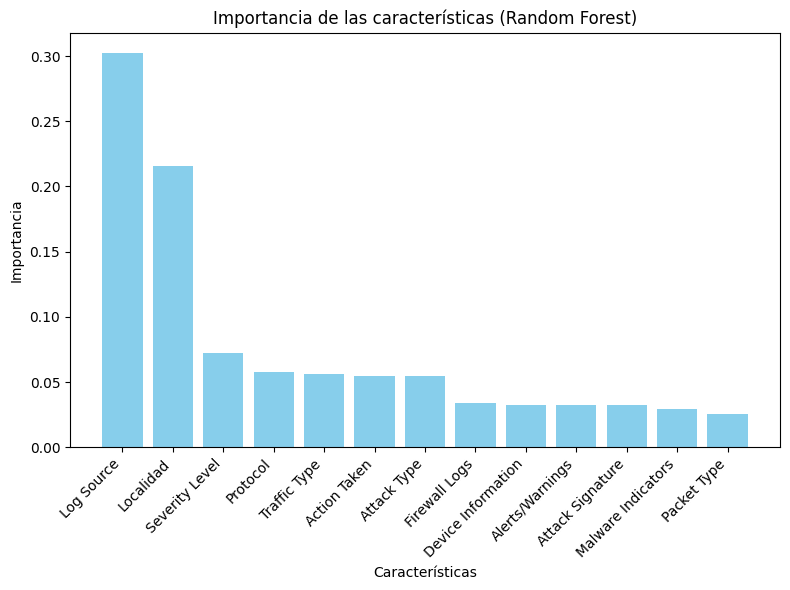

In [14]:
from sklearn.ensemble import RandomForestClassifier

X = df.drop('Action Taken', axis=1)
y = df['Action Taken']

feature_rf = RandomForestClassifier()
feature_rf.fit(X, y)

column_names = [
    'Protocol','Packet Type', 'Traffic Type', 'Malware Indicators','Alerts/Warnings',
    'Attack Type','Attack Signature','Action Taken','Severity Level','Device Information',
    'Firewall Logs','Log Source','Localidad','Region'
]

importances = feature_rf.feature_importances_

indices = np.argsort(importances)[::-1]
sorted_importances = importances[indices]
sorted_features = [column_names[i] for i in indices]

plt.figure(figsize=(8, 6))
plt.bar(sorted_features, sorted_importances, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title("Importancia de las características (Random Forest)")
plt.xlabel("Características")
plt.ylabel("Importancia")
plt.tight_layout()
plt.show()

**Confeccionamos un diagrama de *Heatmap* con el módulo *Seaborn* con la intención de validar o descartar columnas previamente seleccionadas.**

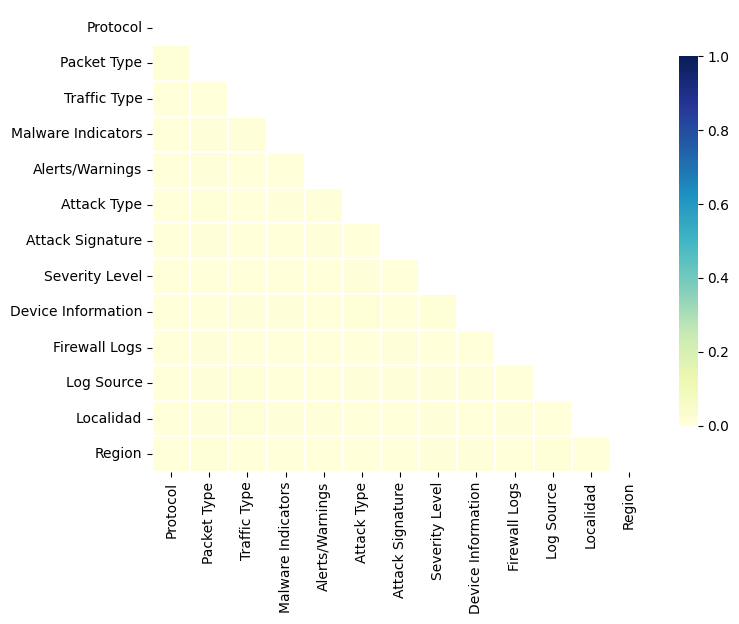

In [15]:
import seaborn as sns

corr = np.abs(df.drop(['Action Taken'], axis=1).corr())

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(8, 6))

sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

Valorando los resultados podemos decir que las columnas con mayor importancia por sus características son *Log Source, Localidad, Severity Level*, y que nuestros datos tienes una correlación correcta.

### División train/test
Nos respaldamos en el módulo *División train/test* para dividir nuestros datos en *train* y *test*.
1. Del total de los datos, tomaremos el 20% de la muestra para el testeo de nuestros modelos. Guardaremos de forma independiente cada dataset en *.CSV*
2. Escalaremos los datos con el módulo *StandardScaler* para lograr eficiencia e intentar mitigar el errores en los modelos de entrenamientos.

**Del total de los datos, tomaremos el 20% de la muestra para el testeo de nuestros modelos. Guardaremos de forma independiente cada dataset en .CSV**

In [16]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, shuffle=True, stratify=df['Action Taken'], random_state=42)

print("Filas y columnas del dataset train:",train.shape)
print("Filas y columnas del dataset test:",test.shape)

#lineas comentadas para evitar reguardar cada vez que reinicio el Kernel.
#train.to_csv('./action_taken_train.csv', sep=',', index=False)  
#test.to_csv('./action_taken_test.csv', sep=',', index=False)

Filas y columnas del dataset train: (32000, 14)
Filas y columnas del dataset test: (8000, 14)


**Escalaremos los datos con el módulo StandardScaler para lograr eficiencia e intentar mitigar el errores en los modelos de entrenamientos.**

In [17]:
from sklearn.preprocessing import StandardScaler

train = pd.read_csv("action_taken_train.csv")
test = pd.read_csv("action_taken_test.csv")

x_train = train.drop('Action Taken', axis=1)
y_train = train['Action Taken']

x_test = test.drop('Action Taken', axis=1)
y_test = test['Action Taken']

scaler = StandardScaler().fit(x_train)
xs_train = scaler.transform(x_train)
xs_test = scaler.transform(x_test)

### Modelado/Evaluación
Utilizaremos los siguientes módulos para entrenar nuestros modelos ML:

* RandomForestClassifier
* LogisticRegression
* KNeighborsClassifier
* DecisionTreeClassifier

Replicaremos en cada módulo el siguiente procedimiento:

1. En cada modelo intentaremos resolver el mejor índice para cada variable, utilzaremos el módulo *GridSearchCV* para *LogisticRegression* y *cross_val_score* para *KNeighborsClassifier*.
2. Entrenaremos los modelos con los datos *"train"* y los evaluaremos con el conjunto de datos *"test"*.
3. Mediremos las métricas de cada entrenamiento con los módulos *confusion_matrix, classification_report, accuracy_score*, analizando los resultados obtenidos.

#### RandomForestClassifier

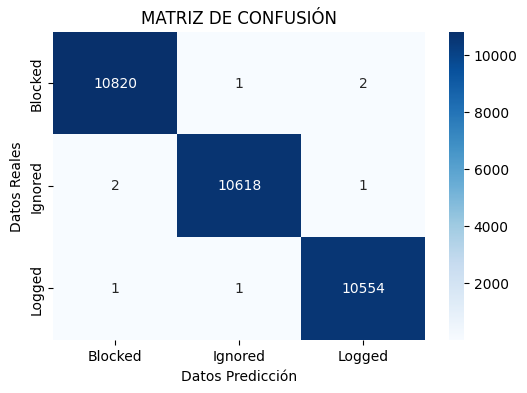

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10823
           1       1.00      1.00      1.00     10621
           2       1.00      1.00      1.00     10556

    accuracy                           1.00     32000
   macro avg       1.00      1.00      1.00     32000
weighted avg       1.00      1.00      1.00     32000

Precisión del modelo RandomForestClassifier_train: 99.98%


In [18]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score, KFold

rf = RandomForestClassifier(max_depth=None, random_state=0).fit(xs_train, y_train)
rf_y_pred = rf.predict(xs_train)

rf_confmat = confusion_matrix(y_train, rf_y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(rf_confmat, annot=True, fmt='d', cmap='Blues', xticklabels=['Blocked', 'Ignored', 'Logged'], yticklabels=['Blocked', 'Ignored', 'Logged'])
plt.xlabel('Datos Predicción')
plt.ylabel('Datos Reales')
plt.title('MATRIZ DE CONFUSIÓN')
plt.show()

print(classification_report(y_train, rf_y_pred))
rf_acc = accuracy_score(y_train, rf_y_pred)
print(f"Precisión del modelo RandomForestClassifier_train: {rf_acc*100:.2f}%")

In [19]:
# Evaluamos el modelo con datos de testeo.

rf_y_pred_test = rf.predict(xs_test)

print(classification_report(y_test, rf_y_pred_test))
rf_acc_test = accuracy_score(y_test, rf_y_pred_test)
print(f"Precisión del modelo RandomForestClassifier_test: {rf_acc_test*100:.2f}%")

              precision    recall  f1-score   support

           0       0.33      0.35      0.34      2706
           1       0.33      0.33      0.33      2655
           2       0.32      0.29      0.31      2639

    accuracy                           0.32      8000
   macro avg       0.32      0.32      0.32      8000
weighted avg       0.32      0.32      0.32      8000

Precisión del modelo RandomForestClassifier_test: 32.38%


#### LogisticRegression

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

vectorC = np.logspace(-4,4,5)
param_grid = {'C': vectorC }
grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')
grid.fit(xs_train, y_train)

print("Mejor índice para 'C':", grid.best_params_['C'])

Mejor índice para 'C': 0.0001


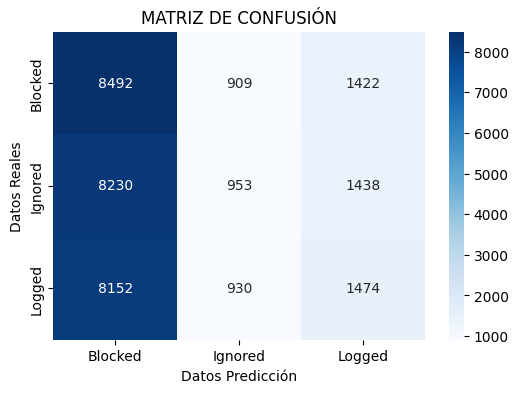

              precision    recall  f1-score   support

           0       0.34      0.78      0.48     10823
           1       0.34      0.09      0.14     10621
           2       0.34      0.14      0.20     10556

    accuracy                           0.34     32000
   macro avg       0.34      0.34      0.27     32000
weighted avg       0.34      0.34      0.27     32000

Precisión del modelo LogisticRegression_train: 34.12%


In [21]:
lr = LogisticRegression(C=0.0001, max_iter=500, random_state=42).fit(xs_train, y_train)
lr_y_pred = lr.predict(xs_train)

lr_confmat = confusion_matrix(y_train, lr_y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(lr_confmat, annot=True, fmt='d', cmap='Blues', xticklabels=['Blocked', 'Ignored', 'Logged'], yticklabels=['Blocked', 'Ignored', 'Logged'])
plt.xlabel('Datos Predicción')
plt.ylabel('Datos Reales')
plt.title('MATRIZ DE CONFUSIÓN')
plt.show()

print(classification_report(y_train, lr_y_pred))
lr_acc = accuracy_score(y_train, lr_y_pred)
print(f"Precisión del modelo LogisticRegression_train: {lr_acc*100:.2f}%")

In [22]:
# Evaluamos el modelo con los datos de testeo.

lr_y_pred_test = lr.predict(xs_test)

print(classification_report(y_test, lr_y_pred_test))
lr_acc_test = accuracy_score(y_test, lr_y_pred_test)
print(f"Precisión del modelo LogisticRegression_test: {lr_acc_test*100:.2f}%")

              precision    recall  f1-score   support

           0       0.34      0.78      0.48      2706
           1       0.34      0.09      0.15      2655
           2       0.32      0.13      0.19      2639

    accuracy                           0.34      8000
   macro avg       0.33      0.34      0.27      8000
weighted avg       0.33      0.34      0.27      8000

Precisión del modelo LogisticRegression_test: 33.92%


#### KNeighborsClassifier

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

valores_k = range(1, 10)
precisiones = []
for k in valores_k:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,x_train, y_train, cv=5, scoring='accuracy')
    precisiones.append(scores.mean())

# Encontrar el valor de k con mejor precisión
mejor_k = valores_k[np.argmax(precisiones)]
print(f"El mejor número de vecinos es: {mejor_k}")

El mejor número de vecinos es: 2


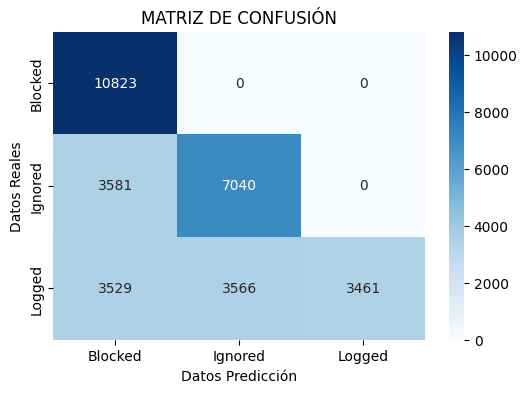

              precision    recall  f1-score   support

           0       0.60      1.00      0.75     10823
           1       0.66      0.66      0.66     10621
           2       1.00      0.33      0.49     10556

    accuracy                           0.67     32000
   macro avg       0.76      0.66      0.64     32000
weighted avg       0.75      0.67      0.64     32000

Precisión del modelo KNeighborsClassifier_train: 66.64%


In [24]:
knn = KNeighborsClassifier(n_neighbors=2).fit(xs_train, y_train)
knn_y_pred = knn.predict(xs_train)

knn_confmat = confusion_matrix(y_train, knn_y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(knn_confmat, annot=True, fmt='d', cmap='Blues', xticklabels=['Blocked', 'Ignored', 'Logged'], yticklabels=['Blocked', 'Ignored', 'Logged'])
plt.xlabel('Datos Predicción')
plt.ylabel('Datos Reales')
plt.title('MATRIZ DE CONFUSIÓN')
plt.show()

print(classification_report(y_train, knn_y_pred))
knn_acc = accuracy_score(y_train, knn_y_pred)
print(f"Precisión del modelo KNeighborsClassifier_train: {knn_acc*100:.2f}%")

In [25]:
# Evaluamos el modelo con datos de testeo.

knn_y_pred_test = knn.predict(xs_test)

print(classification_report(y_test, knn_y_pred_test))
knn_acc_test = accuracy_score(y_test, knn_y_pred_test)
print(f"Precisión del modelo KNeighborsClassifier_test: {knn_acc_test*100:.2f}%")

              precision    recall  f1-score   support

           0       0.34      0.57      0.43      2706
           1       0.33      0.33      0.33      2655
           2       0.34      0.11      0.17      2639

    accuracy                           0.34      8000
   macro avg       0.34      0.34      0.31      8000
weighted avg       0.34      0.34      0.31      8000

Precisión del modelo KNeighborsClassifier_test: 33.88%


#### DecisionTreeClassifier

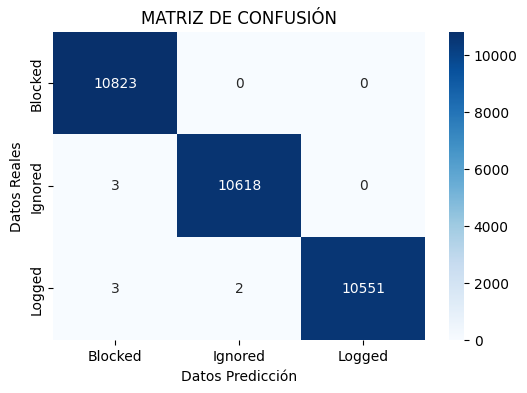

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10823
           1       1.00      1.00      1.00     10621
           2       1.00      1.00      1.00     10556

    accuracy                           1.00     32000
   macro avg       1.00      1.00      1.00     32000
weighted avg       1.00      1.00      1.00     32000

Precisión del modelo DecisionTreeClassifier_train: 99.98%


In [26]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=42).fit(xs_train, y_train)
dtc_y_pred = dtc.predict(xs_train)

dtc_confmat = confusion_matrix(y_train, dtc_y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(dtc_confmat, annot=True, fmt='d', cmap='Blues', xticklabels=['Blocked', 'Ignored', 'Logged'], yticklabels=['Blocked', 'Ignored', 'Logged'])
plt.xlabel('Datos Predicción')
plt.ylabel('Datos Reales')
plt.title('MATRIZ DE CONFUSIÓN')
plt.show()

print(classification_report(y_train, dtc_y_pred))
dtc_acc = accuracy_score(y_train, dtc_y_pred)
print(f"Precisión del modelo DecisionTreeClassifier_train: {dtc_acc*100:.2f}%")

In [27]:
# Evaluamos el modelo con datos de testeo.

dtc_y_pred_test = dtc.predict(xs_test)

print(classification_report(y_test, dtc_y_pred_test))
dtc_acc_test = accuracy_score(y_test, dtc_y_pred_test)
print(f"Precisión del modelo DecisionTreeClassifier_test: {dtc_acc_test*100:.2f}%")

              precision    recall  f1-score   support

           0       0.33      0.33      0.33      2706
           1       0.32      0.33      0.32      2655
           2       0.33      0.32      0.32      2639

    accuracy                           0.33      8000
   macro avg       0.33      0.33      0.33      8000
weighted avg       0.33      0.33      0.33      8000

Precisión del modelo DecisionTreeClassifier_test: 32.64%


#### KFold

Sumamos un nuevo registro con los módulos *cross_val_score, KFold* de Cross-Validation para nuestros modelos entrenados.

Asignamos el índice "3" a la variable *n_splits=3*.

In [28]:
from sklearn.model_selection import cross_val_score, KFold

kf = KFold(n_splits=3, shuffle=True, random_state=42)

scores_rf = cross_val_score(rf, X, y, cv=kf, scoring='accuracy')
print(f"Precisión del modelo RandomForestClassifier_kf: {np.mean(scores_rf)*100:.2f}%")

scores_lr = cross_val_score(lr, X, y, cv=kf, scoring='accuracy')
print(f"Precisión del modelo LogisticRegression_kf: {np.mean(scores_lr)*100:.2f}%")

scores_knn = cross_val_score(knn, X, y, cv=kf, scoring='accuracy')
print(f"Precisión del modelo KNeighborsClassifier_kf: {np.mean(scores_knn)*100:.2f}%")

scores_dtc = cross_val_score(dtc, X, y, cv=kf, scoring='accuracy')
print(f"Precisión del modelo DecisionTreeClassifier_kf: {np.mean(scores_dtc)*100:.2f}%")

Precisión del modelo RandomForestClassifier_kf: 32.99%
Precisión del modelo LogisticRegression_kf: 33.44%
Precisión del modelo KNeighborsClassifier_kf: 33.63%
Precisión del modelo DecisionTreeClassifier_kf: 33.02%


## Conclusiones

A partir del dataset *cybersecurity_attacks.csv* y luego de analizar y transformar columnas y campos del mismo, hemos entrenado diversos modelos de Clasificación para ML, obteniendo resultados variados para cada uno de ellos.

Algunos modelos se adaptaron mejor, por su algoritmo, al tipo de datos que disponemos para entrenarlos, tales como *RandomForestClassifier* y *DecisionTreeClassifier*. Sin embargo, todos los modelos logran una precisión bastante menor en el momento de evaluarlos con el conjunto de datos *test*, forzando modificar algunos parámetros *default* de cada modelo.

Podemos concluir con el siguiente análisis:

- Los valores de *recall* obtenidos para la clase 'Blocked' son elevados, pero limitados para las clases 'Ignored' y 'Logged' tanto en la etapa de entrenamiento como en la de evaluación.
- La tendencia de los modelos es priorizar la clase 'Blocked', que es lo correcto, pero se resigna un porcentaje muy alto de precisión para las predicciones.
- Considerando que los resultados de todos los modelos son similares, incluyendo la validación de KFold, podemos determinar que la mejora la obtendremos:
    - Enriqueciendo el dataset con más datos/evidencias.
    - Revaluando el enfoque en el tratamiento de datos previo a entrenar cada modelo.
    - Modificar los parámetros de cada módulo de manera meticulosa.

#### Resumen de la entrega.

La intención de esta práctica es dejar en evidencia los conocimientos adquiridos en las clases de *Machine Learning y Ciberseguridad*. Me he respaldado en el material disponible para el módulo (Clases grabadas, Notebook, GitHub), guías en https://scikit-learn.org/, diferentes motores de búsqueda.

La entrega se acompaña de los siguientes ficheros:
- Práctica_Machine_Learning.ipynb
- cybersecurity_attacks.csv
- action_taken_train.csv
- action_taken_train.csv

*Sumaré el directorio "Extendido" con algunos análisis extras.*
